In [31]:
# Required Libraries:
import requests # to make TMDB API calls
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb
sb.set()

Data Set Used : Movie Data Set From TMDb



Overarching Question: 

What properties are associated with higher revenue?
- a) Does release date affect revenue?
- b) Does larger budget correlate to higher revenue?
- c) Does movie runtime affect revenue?
- d) Does movie language affect revenue?

## 2015 - 2019 Data Exploratory Analysis

In [32]:
#CSV Data that we obtain from using postman
csv_data_total = pd.read_csv('sortbyrevenue2015-2019.csv')
csv_data_total.head()

,id,original_language,original_title,overview,popularity,release_date,title,vote_average,vote_count,Unnamed: 9
0,299534,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,312.724,43579,Avengers: Endgame,8.3,17495.0,NaN
1,420818,en,The Lion King,"Simba idolizes his father, King Mufasa, and ta...",112.829,43658,The Lion King,7.2,7500.0,NaN
2,330457,en,Frozen II,"Elsa, Anna, Kristoff and Olaf head far into th...",170.693,43789,Frozen II,7.3,7149.0,NaN
3,429617,en,Spider-Man: Far from Home,Peter Parker and his friends go on a summer tr...,277.486,43644,Spider-Man: Far from Home,7.5,9433.0,NaN
4,299537,en,Captain Marvel,The story follows Carol Danvers as she becomes...,217.598,43530,Captain Marvel,7,11016.0,NaN


In [33]:
data_total = pd.DataFrame(csv_data_total[[ "id", "original_language", "original_title", "popularity" , "vote_average" , "vote_count"]])
print(data_total)

          id original_language  \
0     299534                en   
1     420818                en   
2     330457                en   
3     429617                en   
4     299537                en   
5     475557                en   
6     181812                en   
7     301528                en   
8     420817                en   
9     512200                en   
10    384018                en   
11    615453                zh   
12    166428                en   
13    747121                en   
14    420809                en   
15    474350                en   
16    447404                en   
17    399579                en   
18    373571                en   
19    530915                en   
20    466272                en   
21    287947                en   
22    458156                en   
23    546554                en   
24    290859                en   
25    496243                ko   
26    458723                en   
27    479455                en   
28    320288  

In [34]:
#Checking the data types of each columns
data_total.dtypes

id                     int64
original_language     object
original_title        object
popularity           float64
vote_average          object
vote_count           float64
dtype: object

In [35]:
#Checking the keys that are avaiable to be obtained from the api call
r = requests.get('https://api.themoviedb.org/3/movie/'+ '299534' +'?api_key='+ '687cbd505fc165440f634096864c26d6' +'&language=en-US')
x = r.json()
x.keys()    

dict_keys(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count'])

In [36]:
#Creating a dataframe to store the info that we are going to get from api call
columns = ['film', 'revenue' , 'runtime' , 'budget' , 'genres' , 'profit', 'release_date']

df = pd.DataFrame(columns=columns)

ids = pd.DataFrame(data_total['id'])

In [37]:
#Using of requests module to make individual call to each movie to obtain key information needed for our analysis
for i in range(1990):
    count = 0
    x = ids.iloc[i]['id']
    r = requests.get('https://api.themoviedb.org/3/movie/'+ str(x) +'?api_key='+ '687cbd505fc165440f634096864c26d6' +'&language=en-US')
    x = r.json()
    original_title =  x['original_title']
    revenue =  x['revenue']
    budget = x['budget']
    runtime =  x['runtime']
    genres = x['genres']
    profit = revenue - budget
    release_date = x['release_date']
    df = df.append({'film': original_title, 'revenue': revenue, 'runtime': runtime , 'budget': budget , 'genres':genres , 'profit' : profit , 'release_date':release_date}, ignore_index=True)
    

#There are missing data from certain rows here and there so clean up the data as followed
df = df[df.budget!=0]
df = df[df.runtime!=0]
df = df[df.revenue!=0]
df = df[df.profit!=0]


In [38]:
pd.set_option('display.max_rows', None)
df.dropna(inplace = True)
df

,film,revenue,runtime,budget,genres,profit,release_date
0,Avengers: Endgame,2797800564,181,356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",2441800564,2019-04-24
1,The Lion King,1656943394,118,260000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",1396943394,2019-07-12
2,Frozen II,1450026933,103,150000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",1300026933,2019-11-20
3,Spider-Man: Far from Home,1131927996,129,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",971927996,2019-06-28
4,Captain Marvel,1128276090,124,152000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",976276090,2019-03-06
5,Joker,1074251311,122,55000000,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",1019251311,2019-10-02
6,Star Wars: The Rise of Skywalker,1074144248,142,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",824144248,2019-12-18
7,Toy Story 4,1073394593,100,175000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",898394593,2019-06-19
8,Aladdin,1047612394,128,183000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",864612394,2019-05-22
9,Jumanji: The Next Level,796575993,123,125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",671575993,2019-12-04


In [39]:
df.dtypes

film            object
revenue         object
runtime         object
budget          object
genres          object
profit          object
release_date    object
dtype: object

In [40]:
#Changing the type of data to the type that we want to work with
df["revenue"] = df.revenue.astype(float)
df["runtime"] = df.runtime.astype(float)
df["budget"] = df.budget.astype(float)
df["profit"] = df.profit.astype(float)
df.dtypes

film             object
revenue         float64
runtime         float64
budget          float64
genres           object
profit          float64
release_date     object
dtype: object

In [41]:
#Changing the data representation type to decimal form for better visualisation  (the info we want)
info_total = pd.DataFrame(df[['revenue', 'runtime', 'budget', 'profit']])
info_total.describe().apply(lambda s: s.apply('{0:.5f}'.format))


,revenue,runtime,budget,profit
count,1234.00000,1234.00000,1234.00000,1234.00000
mean,118410978.25770,114.09238,33805137.20583,84605841.05186
std,250328959.45206,24.86811,50136974.44247,212723650.12147
min,3238.00000,2.00000,1.00000,-151000000.00000
25%,4403159.75000,98.00000,4000000.00000,-134149.00000
50%,26404788.50000,111.00000,13000000.00000,8960000.00000
75%,103966110.25000,127.00000,38000000.00000,69011054.50000
max,2797800564.00000,480.00000,356000000.00000,2441800564.00000


In [42]:
language = data_total['original_language'].value_counts()
language

en    1122
zh      85
ru      82
fr      80
hi      74
ml      68
es      65
ja      62
ko      51
tr      39
it      32
de      29
ur      25
te      24
fa      14
ta      14
kn      11
no      11
tl       9
cn       9
nl       8
pt       8
sv       7
ar       7
ms       4
uk       4
hu       4
vi       4
cs       4
bn       4
fi       4
da       4
pa       4
pl       3
ro       3
lt       2
mr       2
ne       2
sw       1
bg       1
si       1
ab       1
mn       1
ka       1
gu       1
sk       1
he       1
et       1
is       1
be       1
th       1
la       1
Name: original_language, dtype: int64

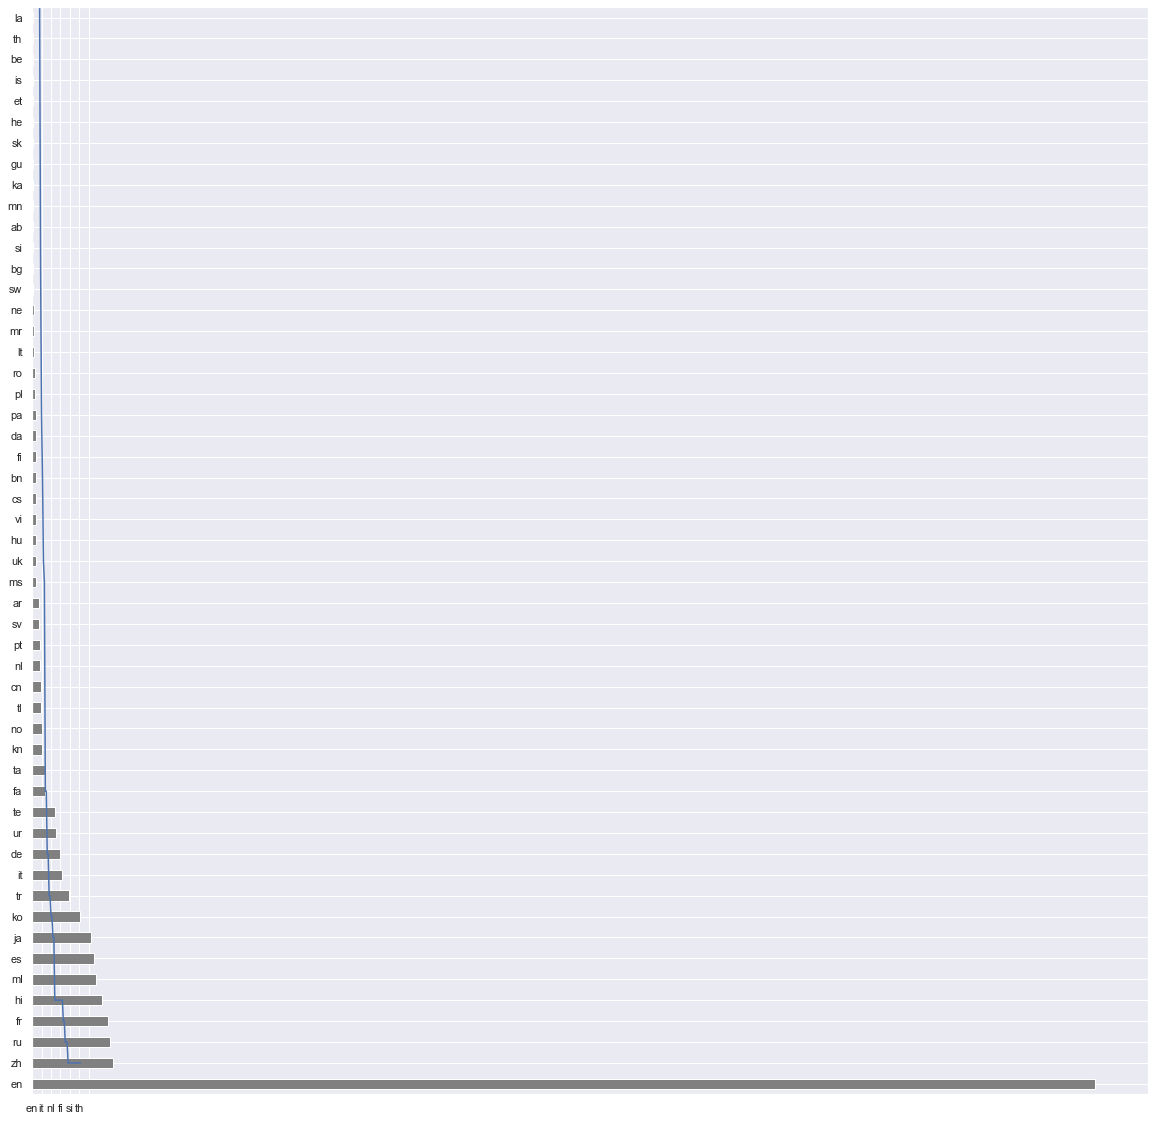

In [43]:
language.plot(figsize=(20,20));
language.plot(kind='barh', color= 'grey')
plt.rcParams["axes.grid"] = False


-------------------------------------------------------------------------------------------------------------------------------
This part is for answering : Does release date affect revenue?
We looking at the distribution of movie release across the year and whether it will play a part in deciding the revenue

In [148]:
#Changing the object type to time-series type for grouping of the movie release dates across a particular year
df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)
#Distribution of 2015-2019 Movie Release Date
distribution_total = df['release_date'].groupby(df.release_date.dt.to_period("M")).agg('count')
distribution_total

release_date
2015-01    13
2015-02    19
2015-03    21
2015-04    18
2015-05    21
2015-06    18
2015-07    23
2015-08    21
2015-09    33
2015-10    26
2015-11    20
2015-12    22
2016-01    24
2016-02    28
2016-03    15
2016-04    25
2016-05    19
2016-06    25
2016-07    22
2016-08    14
2016-09    39
2016-10    25
2016-11    30
2016-12    31
2017-01    27
2017-02    18
2017-03    25
2017-04    19
2017-05    19
2017-06    17
2017-07    19
2017-08    18
2017-09    28
2017-10    29
2017-11    16
2017-12    23
2018-01    23
2018-02    19
2018-03    19
2018-04    14
2018-05    14
2018-06    21
2018-07    14
2018-08    23
2018-09    20
2018-10    27
2018-11    20
2018-12    15
2019-01    15
2019-02    13
2019-03    12
2019-04    14
2019-05    17
2019-06    13
2019-07     8
2019-08    16
2019-09    22
2019-10    22
2019-11    20
2019-12    23
Freq: M, Name: release_date, dtype: int64

Text(0, 0.5, 'Count')

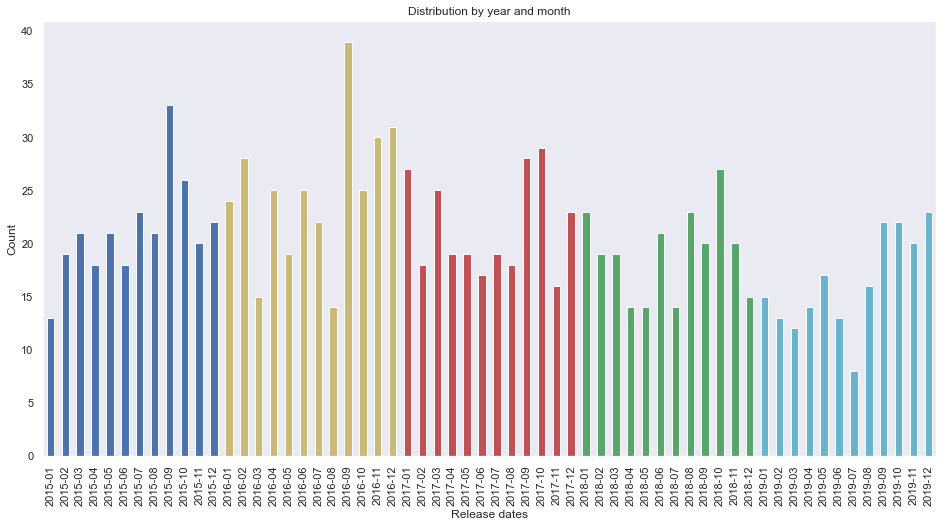

In [190]:
from itertools import cycle, islice
#Visualisation of the Distribution of movie release dates
distribution_total.plot(figsize=(16,8));
#distribution_total.plot.bar()
my_colors = list(islice(cycle(['b', 'b', 'b', 'b', 'b' , 'b' , 'b' , 'b' , 'b' , 'b' , 'b' , 'b' , 'y', 'y', 'y', 'y', 'y' , 'y' , 'y' , 'y' , 'y' , 'y' , 'y' , 'y','r', 'r', 'r', 'r', 'r' , 'r' , 'r' , 'r' , 'r' , 'r' , 'r' , 'r' ,'g', 'g', 'g', 'g', 'g' , 'g' , 'g' , 'g' , 'g' , 'g' , 'g' , 'g' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c']), None, len(distribution_total)))
distribution_total.plot(kind='bar', stacked=True, color=my_colors)
plt.rcParams["axes.grid"] = False
plt.title('Distribution by year and month')
plt.xlabel('Release dates')
plt.ylabel('Count')


In [189]:
df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)
#Distribution of 2015-2019 Movie Release Date by revenue 
revenue_by_month = df.groupby(df.release_date.dt.to_period("M"))['revenue'].sum()
revenue_by_month

release_date
2015-01    7.437356e+08
2015-02    1.479950e+09
2015-03    1.746816e+09
2015-04    3.409816e+09
2015-05    1.833387e+09
2015-06    4.712028e+09
2015-07    2.512584e+09
2015-08    1.113936e+09
2015-09    2.684330e+09
2015-10    1.687513e+09
2015-11    2.013730e+09
2015-12    4.089428e+09
2016-01    1.781310e+09
2016-02    2.930151e+09
2016-03    1.645031e+09
2016-04    2.973467e+09
2016-05    2.426170e+09
2016-06    5.033062e+09
2016-07    2.193907e+09
2016-08    1.410153e+09
2016-09    1.820847e+09
2016-10    2.279706e+09
2016-11    3.695745e+09
2016-12    3.469452e+09
2017-01    1.443453e+09
2017-02    1.985809e+09
2017-03    3.245403e+09
2017-04    2.575571e+09
2017-05    2.469277e+09
2017-06    3.026557e+09
2017-07    3.583069e+09
2017-08    1.202420e+09
2017-09    2.290193e+09
2017-10    2.991761e+09
2017-11    2.284321e+09
2017-12    4.007050e+09
2018-01    1.303419e+09
2018-02    3.046222e+09
2018-03    1.701608e+09
2018-04    3.146732e+09
2018-05    1.619006e+09
201

Text(0, 0.5, 'Revenue')

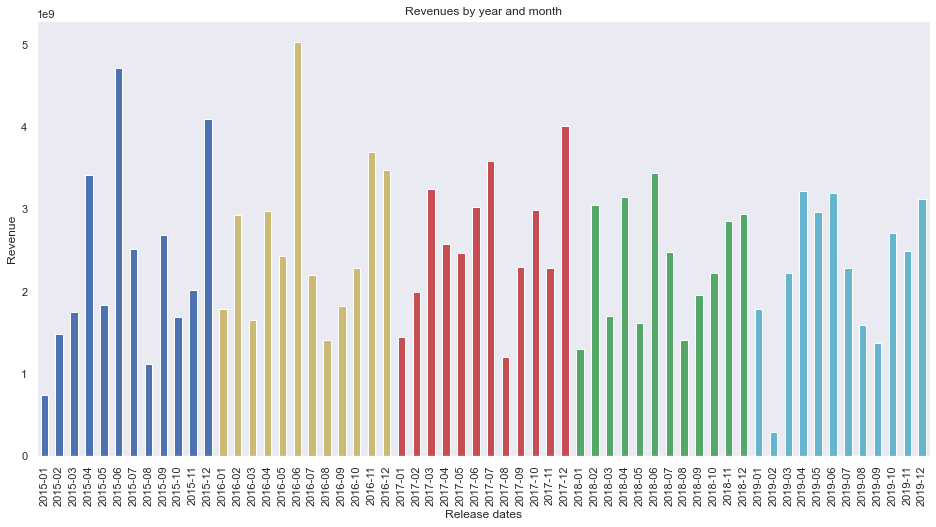

In [193]:
#Visualisation of the Distribution of revenue of movie release dates
revenue_by_month.plot(figsize=(16,8));
#distribution_total.plot.bar()
my_colors = list(islice(cycle(['b', 'b', 'b', 'b', 'b' , 'b' , 'b' , 'b' , 'b' , 'b' , 'b' , 'b' , 'y', 'y', 'y', 'y', 'y' , 'y' , 'y' , 'y' , 'y' , 'y' , 'y' , 'y','r', 'r', 'r', 'r', 'r' , 'r' , 'r' , 'r' , 'r' , 'r' , 'r' , 'r' ,'g', 'g', 'g', 'g', 'g' , 'g' , 'g' , 'g' , 'g' , 'g' , 'g' , 'g' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c' , 'c']), None, len(distribution_total)))
revenue_by_month.plot(kind='bar', stacked=True, color=my_colors)
plt.rcParams["axes.grid"] = False
plt.title('Revenues by year and month')
plt.xlabel('Release dates')
plt.ylabel('Revenue')


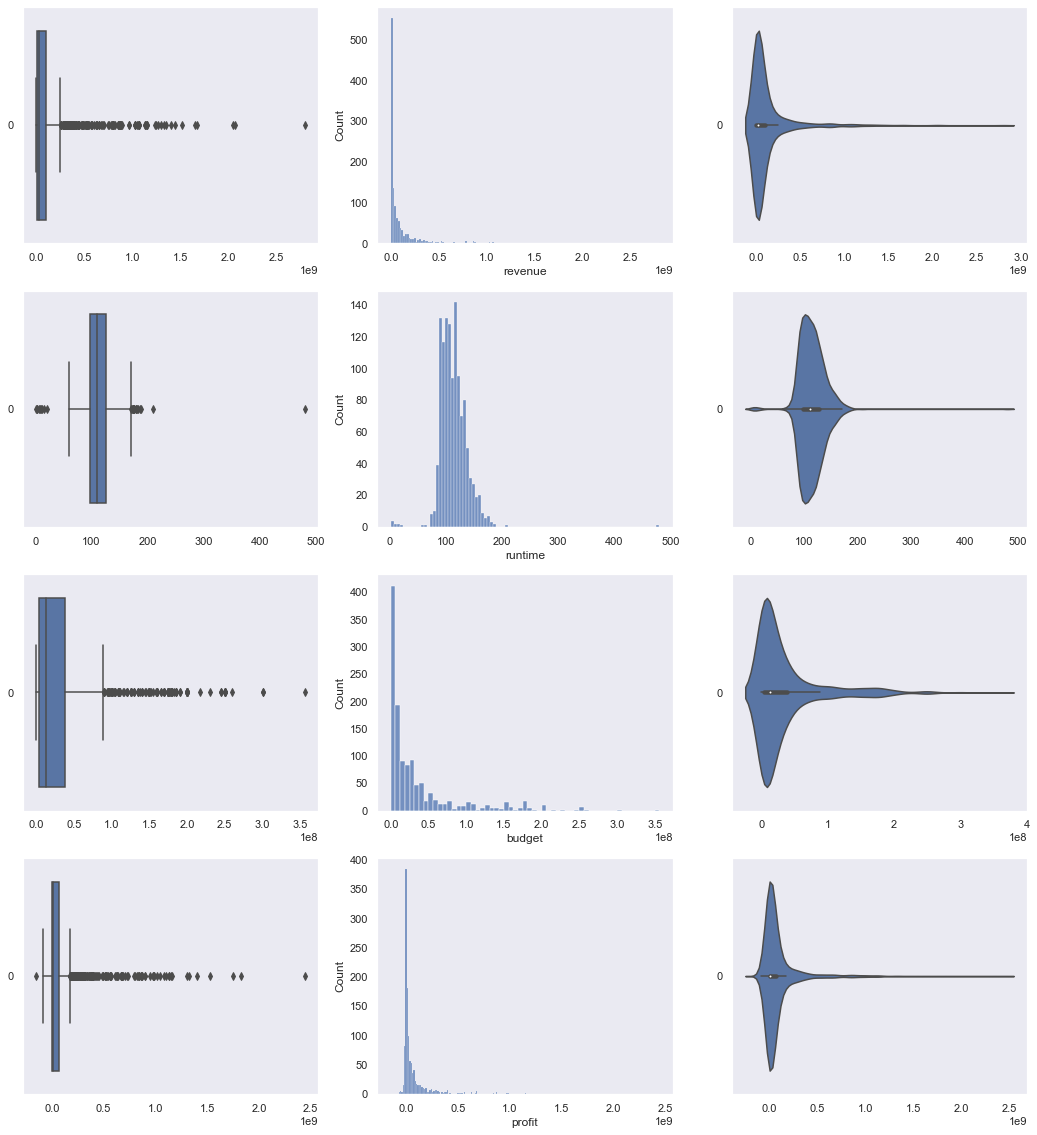

In [46]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))
plt.rcParams["axes.grid"] = False


count = 0
for var in info_total:
    sb.boxplot(data = info_total[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = info_total[var], ax = axes[count,1])
    sb.violinplot(data = info_total[var], orient = "h", ax = axes[count,2])
    count += 1

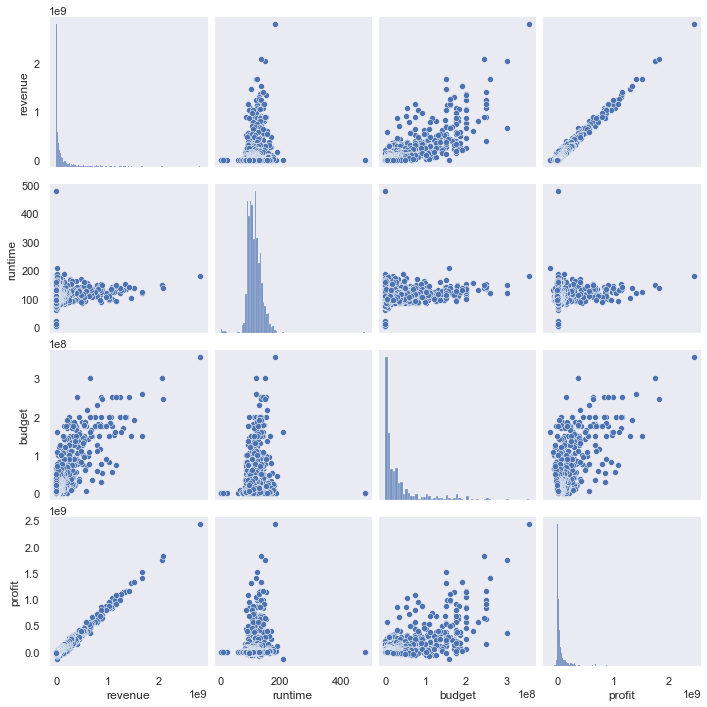

In [47]:
sb.pairplot(data = info_total)

In [48]:
# Loading dataset
revenue = pd.DataFrame(info_total['revenue'])   # Response
budget = pd.DataFrame(info_total['budget'])         # Predictor

revenue = np.log(revenue)
budget = np.log(budget)



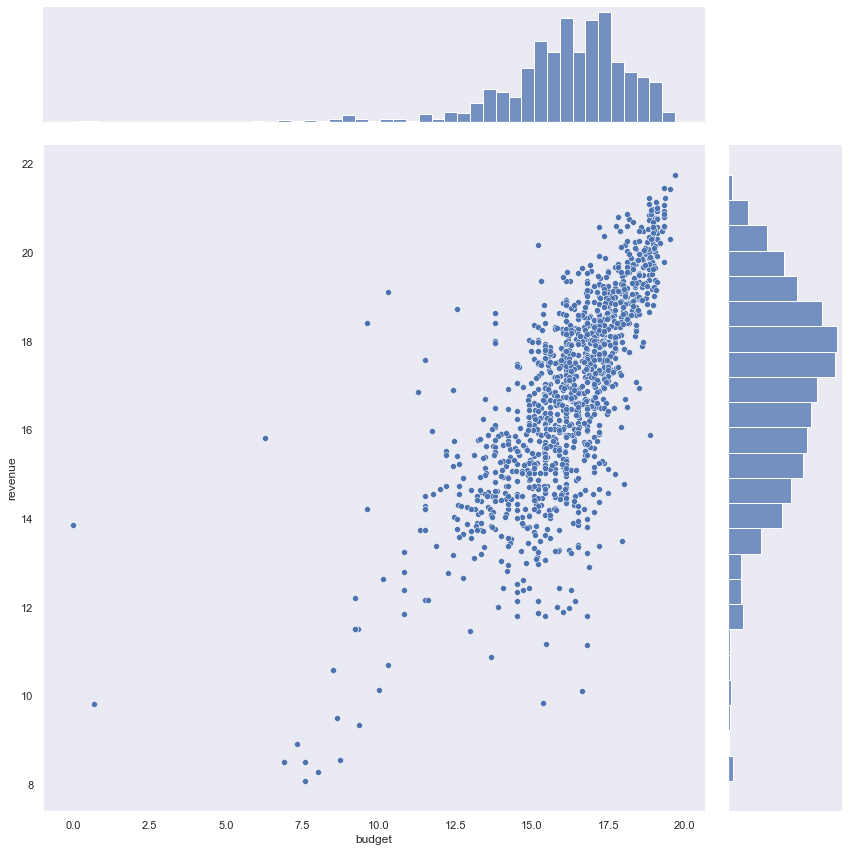

In [49]:
trainDF = pd.concat([budget, revenue], axis = 1).reindex(budget.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "budget", y = "revenue", height = 12)

In [51]:
# Importing modeules that are required
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
  
# X, y = dataset.data, dataset.target
X,y = budget,revenue
  
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)
  
# Creating and training model
model = BayesianRidge()
model.fit(X_train, y_train.values.ravel())
  
# Model making a prediction on train data
prediction = model.predict(X_train)
  
# Evaluation of r2 score of the model against the train set
print(f"r2 Score Of Train Set : {r2_score(y_train, prediction)}")

print('Intercept \t: b = ', model.intercept_)
print('Coefficients \t: a = ', model.coef_)

r2 Score Of Train Set : 0.5653140347345316
Intercept 	: b =  3.952244162644165
Coefficients 	: a =  [0.79881088]


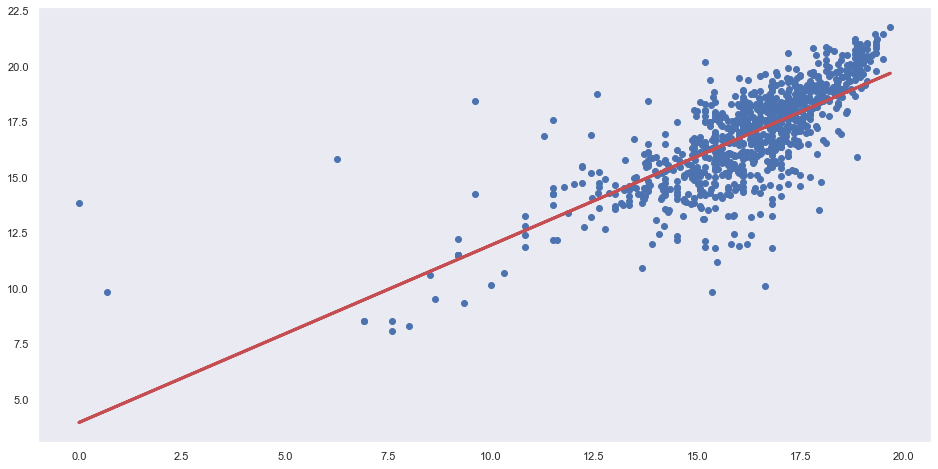

In [52]:
regline_x = X_train 
regline_y = model.intercept_ + model.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.rcParams["axes.grid"] = False
plt.show()

In [53]:
# Model making a prediction on test data
prediction = model.predict(X_test)
  
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

print('Intercept \t: b = ', model.intercept_)
print('Coefficients \t: a = ', model.coef_)

r2 Score Of Test Set : 0.5333608482040273
Intercept 	: b =  3.952244162644165
Coefficients 	: a =  [0.79881088]


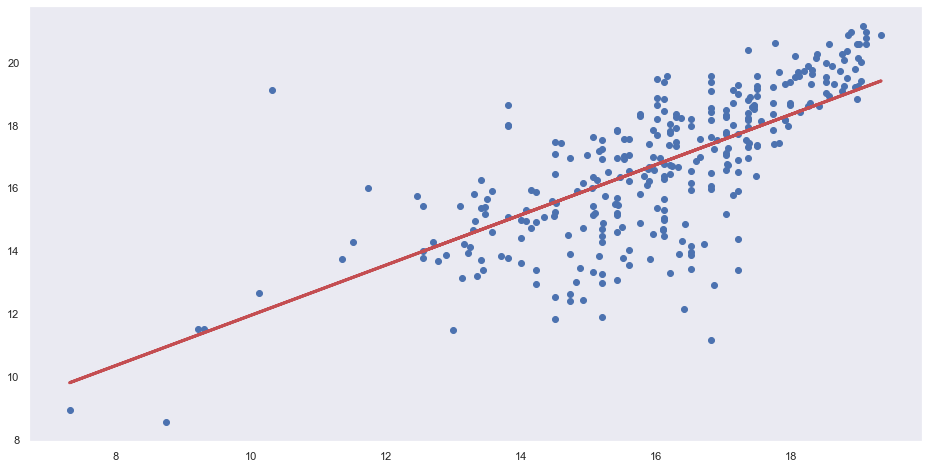

In [54]:
# Plot the Linear Regression line
regline_x = X_test
regline_y = model.intercept_ + model.coef_ * X_test
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.rcParams["axes.grid"] = False
plt.show()

Classification Decision Tree for movie runtime

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [70]:
# Create a Decision Tree Classifier object
X = pd.DataFrame(info_total['revenue'])
#X=X.astype('str')
y_old = pd.DataFrame(info_total['runtime'])

In [71]:
y_old['more_than_100'] = np.where(df['runtime'] <= 100, True, False)
y = pd.DataFrame(y_old['more_than_100'])
y = y.astype(int)
y.shape

(1234, 1)

In [138]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 300)

classifier = RandomForestClassifier(n_estimators=100, max_depth = 2, bootstrap = False)

# Train the model using the training sets
classifier.fit(X_train, y_train.values.ravel())


RandomForestClassifier(bootstrap=False, max_depth=2)

In [139]:
# predicting on the test set
y_pred = classifier.predict(X_test)

In [140]:
# Calculate Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7475728155339806


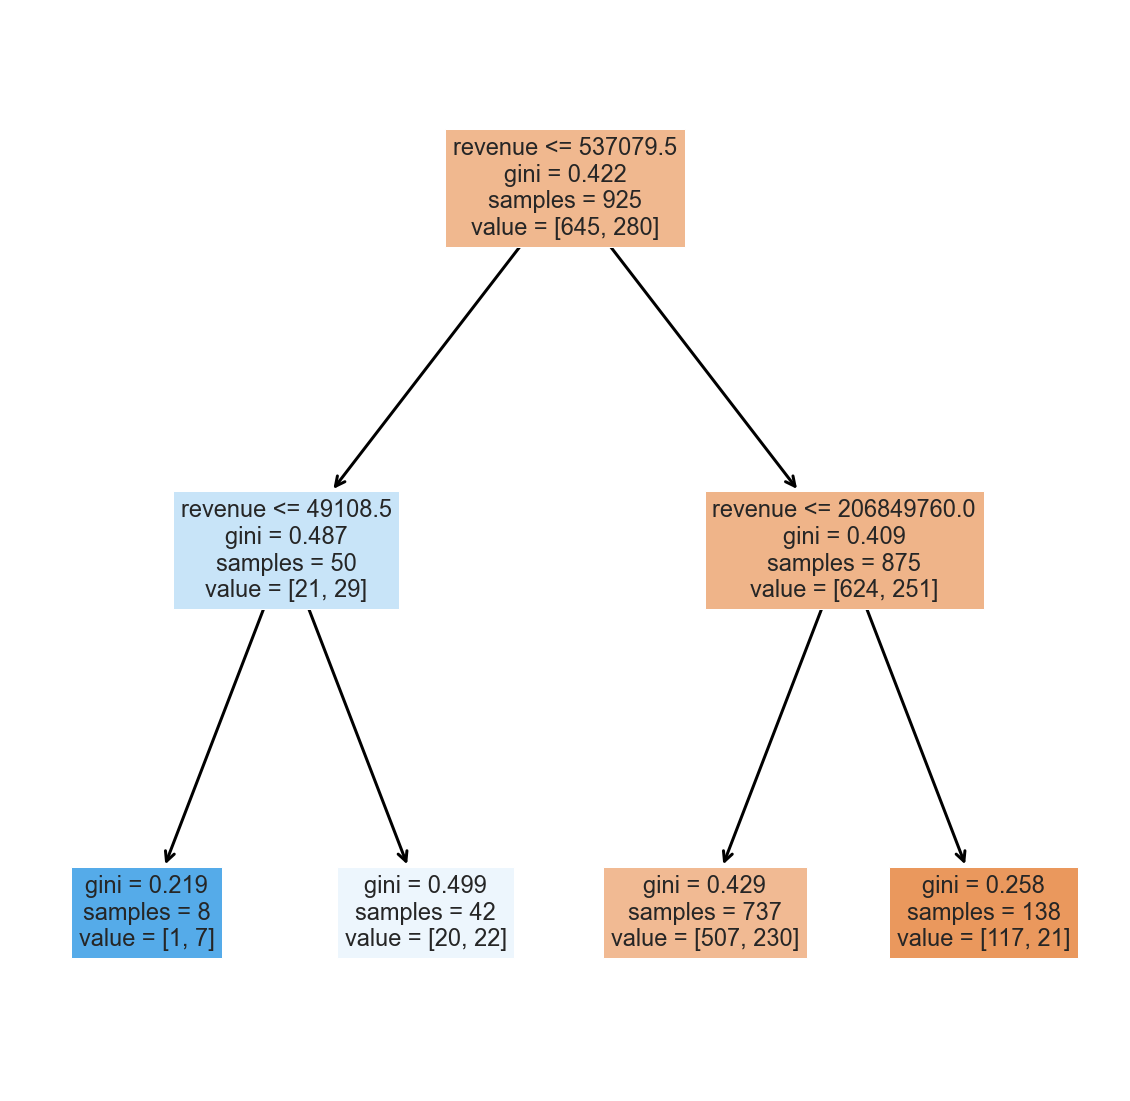

In [145]:
from sklearn import tree
plt.figure(figsize=(20, 20))
out = tree.plot_tree(classifier.estimators_[0], feature_names=X.columns, filled=True)

#for arrows

for i in out:
    arrow = i.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("Black")
        arrow.set_linewidth(3)